In [2]:
import pandas as pd

# Charger les données
file_path = "Loan_Data.csv"
df = pd.read_csv(file_path)

# Afficher les premières lignes et les informations générales
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


(None,
    customer_id  credit_lines_outstanding  loan_amt_outstanding  \
 0      8153374                         0           5221.545193   
 1      7442532                         5           1958.928726   
 2      2256073                         0           3363.009259   
 3      4885975                         0           4766.648001   
 4      4700614                         1           1345.827718   
 
    total_debt_outstanding       income  years_employed  fico_score  default  
 0             3915.471226  78039.38546               5         605        0  
 1             8228.752520  26648.43525               2         572        1  
 2             2027.830850  65866.71246               4         602        0  
 3             2501.730397  74356.88347               5         612        0  
 4             1768.826187  23448.32631               6         631        0  )

<Figure size 1200x800 with 0 Axes>

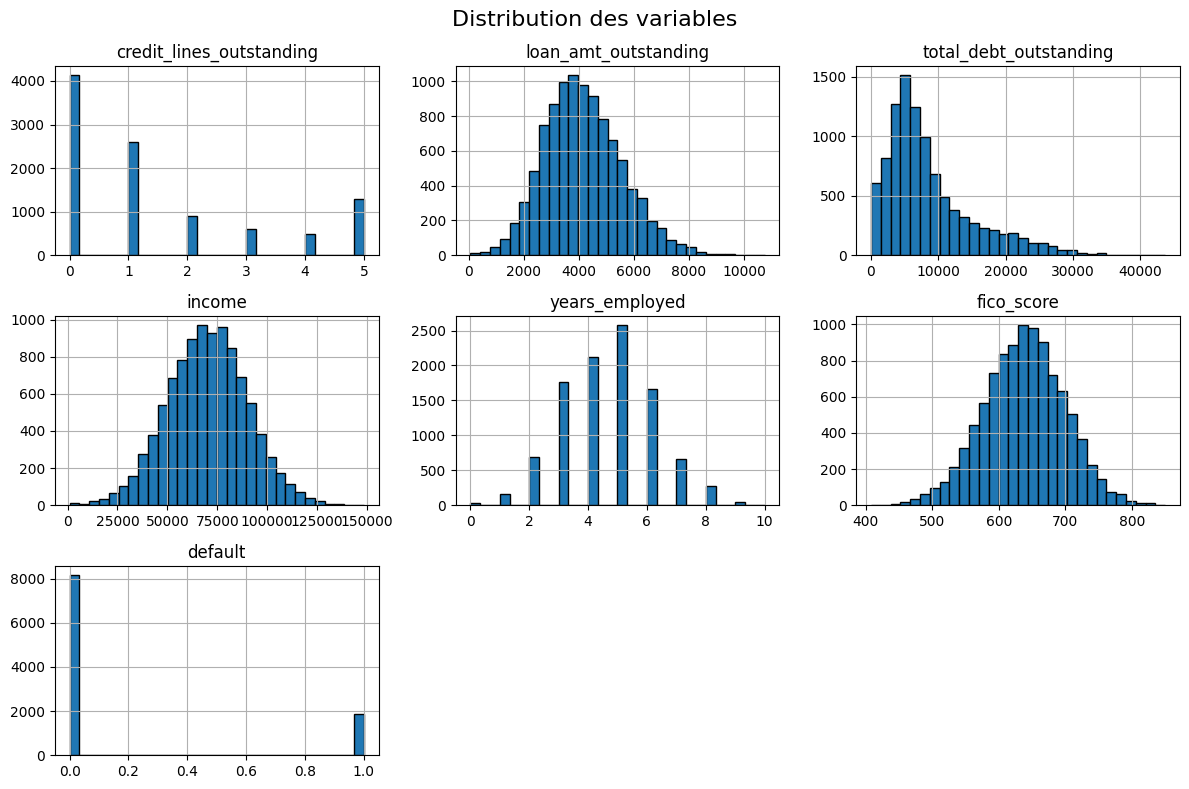

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Définir la taille des graphiques
plt.figure(figsize=(12, 8))

# Tracer la distribution des variables numériques
df.drop(columns=["customer_id"]).hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor="black")

plt.suptitle("Distribution des variables", fontsize=16)
plt.tight_layout()
plt.show()


/tmp/ipykernel_970868/221925974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["default"], palette="pastel")


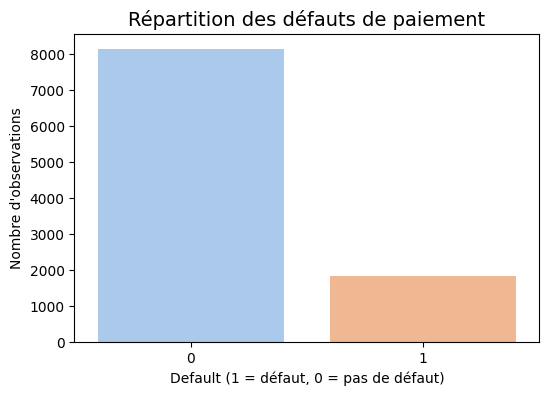

default
0    0.8149
1    0.1851
Name: proportion, dtype: float64

In [4]:
# Vérifier l'équilibre des classes dans la variable cible
plt.figure(figsize=(6, 4))
sns.countplot(x=df["default"], palette="pastel")
plt.title("Répartition des défauts de paiement", fontsize=14)
plt.xlabel("Default (1 = défaut, 0 = pas de défaut)")
plt.ylabel("Nombre d'observations")
plt.show()

# Calcul des proportions
default_counts = df["default"].value_counts(normalize=True)
default_counts


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Suppression de l'ID client
df_cleaned = df.drop(columns=["customer_id"])

# Séparer les features et la cible
X = df_cleaned.drop(columns=["default"])
y = df_cleaned["default"]

# Division en train et test (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalisation des variables continues
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Vérification des dimensions après prétraitement
X_train_scaled.shape, X_test_scaled.shape


((8000, 6), (2000, 6))

## Entrainement de modele

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Initialiser le modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train)

# Prédire les valeurs sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calculer le score R^2
score = r2_score(y_test, y_pred)
score

0.7838577886242896